In [27]:
#pip install mpl_finance

In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

In [6]:
instrument = 'AAPL'
start_date = '2017-01-01'
end_date = '2022-01-02'

df_download = web.DataReader(instrument, 'yahoo', start = start_date, end = end_date)

In [7]:
df_download.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.257643
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.227135
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.365597
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.670677
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.924122


In [9]:
df_download.to_csv(f'{instrument} History.csv')

In [33]:
#df = pd.read_csv('AAPL History.csv', parse_dates=True, index_col='Date')
df = pd.read_csv('AAPL History.csv')

In [34]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.257643
1,2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.227135
2,2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.365597
3,2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.670677
4,2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.924122


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].apply(mdates.date2num)

In [40]:
candle_data = df[['Date','Open', 'High', 'Low', 'Close']]
print(candle_data.head())

      Date       Open       High        Low      Close
0  17169.0  28.950001  29.082500  28.690001  29.037500
1  17170.0  28.962500  29.127501  28.937500  29.004999
2  17171.0  28.980000  29.215000  28.952499  29.152500
3  17172.0  29.195000  29.540001  29.117500  29.477501
4  17175.0  29.487499  29.857500  29.485001  29.747499


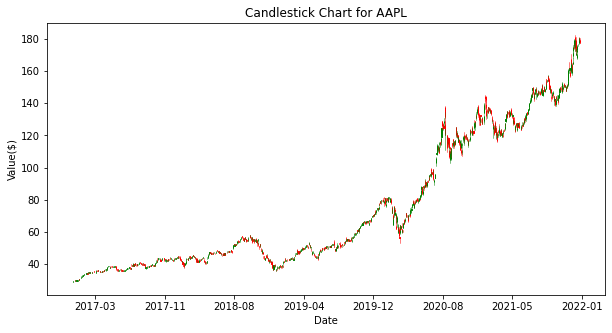

In [41]:
f1, ax = plt.subplots(figsize = (10,5))
candlestick_ohlc(ax,candle_data.values, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Candlestick Chart for AAPL')
plt.xlabel('Date')
plt.ylabel('Value($)')
plt.show()

In [42]:
df['Daily Log Rate of Return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))

print(df['Daily Log Rate of Return'])


0            NaN
1      -0.001120
2       0.005073
3       0.011087
4       0.009118
          ...   
1254    0.022715
1255   -0.005784
1256    0.000502
1257   -0.006600
1258   -0.003542
Name: Daily Log Rate of Return, Length: 1259, dtype: float64


In [43]:

stdev = np.std(df['Daily Log Rate of Return'])
print(stdev)



0.01919078545012417


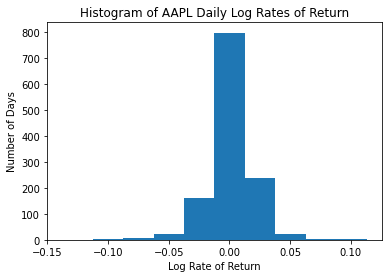

In [44]:
plt.hist(df['Daily Log Rate of Return'].dropna())
plt.title('Histogram of AAPL Daily Log Rates of Return')
plt.xlabel('Log Rate of Return')
plt.ylabel('Number of Days')
plt.show()

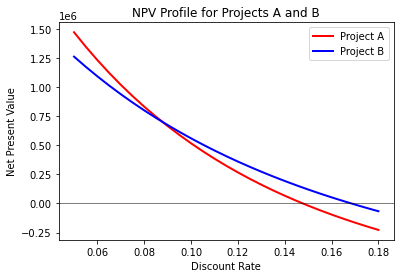

In [45]:
# Update Project A Cash Flows Here
project_a = [-1000000, 0, 0, 50000, 50000, 200000, 250000, 250000, 250000, 250000, 375000, 375000, 375000, 375000, 375000, 250000, 250000, 250000, 250000, 100000]

# Update Project B Cash Flows Here
project_b = [-1000000, 50000, 50000, 50000, 50000, 250000, 500000, 500000, 500000, 500000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]

discount_rate = [0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18]

def calculate_npv(rate, cash_flow):
    npv = 0
    for t in range(len(cash_flow)):
        npv += cash_flow[t]/(1+rate)**t
    return npv

npvs_a = list()
npvs_b = list()
for rate in discount_rate:
  npv_a = calculate_npv(rate,project_a)
  npvs_a.append(npv_a)
  npv_b = calculate_npv(rate,project_b)
  npvs_b.append(npv_b)
  
plt.plot(discount_rate,npvs_a, linewidth = 2.0, color = "red", label = "Project A")
plt.plot(discount_rate,npvs_b, linewidth = 2.0, color = "blue", label = "Project B")
plt.axhline(y=0, linewidth = 0.5, color = "black")
plt.title('NPV Profile for Projects A and B')
plt.xlabel('Discount Rate')
plt.ylabel('Net Present Value')
plt.legend()
plt.show()

In [1]:
print('this is a test')

this is a test
